In [6]:
data_path = 'datasets/antidepressant-study/'

In [3]:
import pyedflib
import numpy as np
import pandas as pd
import mne
from pydmd import DMD


In [4]:
def edf_to_arr(edf_path):
    f = pyedflib.EdfReader(edf_path)
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)

    return sigbufs

In [16]:
test_arr[:-3,:].shape

(32, 95744)

In [7]:
test_arr = edf_to_arr(data_path + 'DD01S1EC-edf.edf')
test_arr

array([[ -8.2137139 , -12.09207567, -14.80979197, ...,  -3.86845113,
         -3.86845113,  -3.86845113],
       [  2.33158316,  -1.93772612,  -5.35115376, ...,  -7.6032081 ,
         -7.6032081 ,  -7.6032081 ],
       [  2.37042204,  -0.36973329,  -1.80362279, ...,   0.72257521,
          0.72257521,   0.72257521],
       ...,
       [  7.00555132,   5.71739506,   3.6169313 , ..., -46.99607415,
        -46.99607415, -46.99607415],
       [ -4.01718981,  -5.68536134,  -7.0160191 , ..., -15.5857654 ,
        -15.5857654 , -15.5857654 ],
       [-15.37876182, -16.13512788, -12.9379481 , ...,   3.12563164,
          3.12563164,   3.12563164]], shape=(35, 95744))

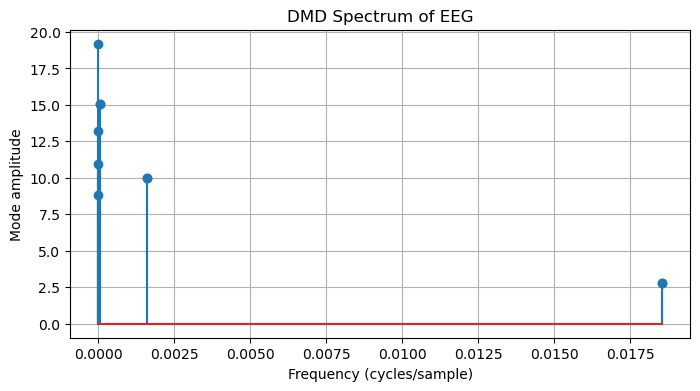

[[ -8.2137139  -12.09207567 -14.80979197 ...  -3.86845113  -3.86845113
   -3.86845113]
 [  2.33158316  -1.93772612  -5.35115376 ...  -7.6032081   -7.6032081
   -7.6032081 ]
 [  2.37042204  -0.36973329  -1.80362279 ...   0.72257521   0.72257521
    0.72257521]
 ...
 [  7.00555132   5.71739506   3.6169313  ... -46.99607415 -46.99607415
  -46.99607415]
 [ -4.01718981  -5.68536134  -7.0160191  ... -15.5857654  -15.5857654
  -15.5857654 ]
 [-15.37876182 -16.13512788 -12.9379481  ...   3.12563164   3.12563164
    3.12563164]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load EEG data (shape: channels x time, so per participant)
# Example simulated EEG data (replace with your own)
n_channels = 64
n_timepoints = 1000000
eeg_data = test_arr

# Step 2: Apply DMD (you can transpose depending on dimensionality preference)
dmd = DMD(svd_rank=10)  # svd_rank = number of modes to keep
dmd.fit(eeg_data)

# Step 3: Output details
eigenvalues = dmd.eigs         # Complex frequencies of modes
dmd_modes = dmd.modes          # Each column = spatial mode (shape: channels x modes)
dmd_amplitudes = dmd.amplitudes #Initial weights (importance) of each mode
dmd_dynamics = dmd.dynamics    # Temporal evolution of each mode

# Step 4: Visualize frequency spectrum (from eigenvalues)
frequencies = np.abs(np.angle(eigenvalues)) / (2 * np.pi)  # In cycles/sample

plt.figure(figsize=(8, 4))
plt.stem(frequencies, np.abs(dmd_amplitudes))
plt.xlabel("Frequency (cycles/sample)")
plt.ylabel("Mode amplitude")
plt.title("DMD Spectrum of EEG")
plt.grid(True)
plt.show()

# Step 5 (Optional): Reconstruct signal from DMD modes
reconstructed = dmd.reconstructed_data.real
print(eeg_data)

In [12]:
eigenvalues = dmd.eigs         # Complex frequencies of modes
dmd_modes = dmd.modes          # Each column = spatial mode (shape: channels x modes)
dmd_amplitudes = dmd.amplitudes
dmd_dynamics = dmd.dynamics    # Temporal evolution of each mode


In [13]:
import pandas as pd
df = pd.DataFrame(dmd_modes)
df

,0,1,2,3,4,5,6,7,8,9
0,0.095444+0.013498j,0.095444-0.013498j,-0.163394+0.000000j,-0.154904+0.084802j,-0.154904-0.084802j,0.016477+0.000000j,0.008398-0.004036j,0.008398+0.004036j,0.229453+0.000000j,0.111728+0.000000j
1,0.085008+0.003236j,0.085008-0.003236j,-0.087912+0.000000j,-0.158885+0.106652j,-0.158885-0.106652j,0.095602+0.000000j,-0.000424-0.070968j,-0.000424+0.070968j,0.208202+0.000000j,0.036513+0.000000j
2,0.079810-0.004256j,0.079810+0.004256j,-0.269224+0.000000j,-0.083726+0.030977j,-0.083726-0.030977j,0.017996+0.000000j,-0.019182+0.005577j,-0.019182-0.005577j,0.058624+0.000000j,0.073155+0.000000j
3,0.079789+0.005928j,0.079789-0.005928j,-0.066116+0.000000j,-0.100802+0.118915j,-0.100802-0.118915j,0.043429+0.000000j,-0.030215-0.029292j,-0.030215+0.029292j,0.022098+0.000000j,-0.013172+0.000000j
4,0.049735-0.001328j,0.049735+0.001328j,-0.186757+0.000000j,0.049851-0.015878j,0.049851+0.015878j,-0.075302+0.000000j,-0.028097+0.014564j,-0.028097-0.014564j,0.006893+0.000000j,0.032151+0.000000j
5,-0.396491-0.146436j,-0.396491+0.146436j,0.324194+0.000000j,0.164202+0.176032j,0.164202-0.176032j,-0.589672+0.000000j,-0.052299+0.012138j,-0.052299-0.012138j,-0.078925+0.000000j,-0.028772+0.000000j
6,0.018180+0.001001j,0.018180-0.001001j,-0.033011+0.000000j,0.251015-0.156318j,0.251015+0.156318j,-0.156595+0.000000j,-0.035838+0.011836j,-0.035838-0.011836j,0.009932+0.000000j,0.030716+0.000000j
7,0.055558+0.010178j,0.055558-0.010178j,0.352617+0.000000j,0.256260-0.006760j,0.256260+0.006760j,-0.140715+0.000000j,-0.035476-0.000640j,-0.035476+0.000640j,-0.021902+0.000000j,0.002735+0.000000j
8,-0.009070+0.030446j,-0.009070-0.030446j,0.072574+0.000000j,0.120815-0.165210j,0.120815+0.165210j,-0.067087+0.000000j,-0.039087+0.012733j,-0.039087-0.012733j,0.006029+0.000000j,0.012824+0.000000j
9,0.063766+0.018468j,0.063766-0.018468j,0.315223+0.000000j,0.079257-0.069499j,0.079257+0.069499j,-0.000561+0.000000j,-0.033251+0.005381j,-0.033251-0.005381j,-0.018973+0.000000j,0.007141+0.000000j


In [14]:
damping_ratios = -np.real(dmd.eigs) / np.sqrt(np.real(dmd.eigs)**2 + np.imag(dmd.eigs)**2)
frequencies = np.abs(np.angle(eigenvalues)) / (2 * np.pi)  # In cycles/sample
print(damping_ratios)
print(frequencies)

[-0.99322242 -0.99322242 -1.         -0.99995035 -0.99995035 -1.
 -0.99999994 -0.99999994 -1.         -1.        ]
[1.85403587e-02 1.85403587e-02 0.00000000e+00 1.58594574e-03
 1.58594574e-03 0.00000000e+00 5.48068411e-05 5.48068411e-05
 0.00000000e+00 0.00000000e+00]


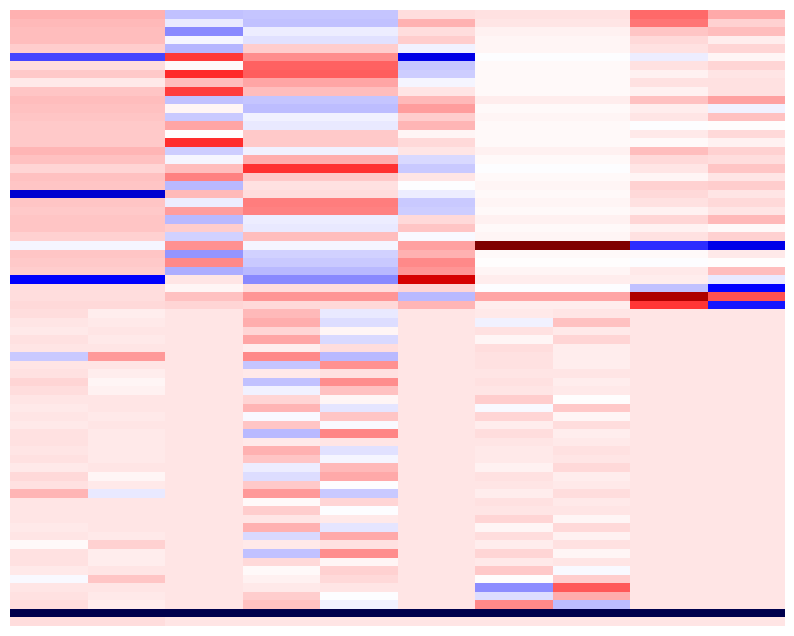

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace these with your actual data)
Phi_phys_unique_norm_real = np.real(dmd.modes)  # Real part of normalized DMD modes
Phi_phys_unique_norm_imag = np.imag(dmd_modes)  # Imaginary part of normalized DMD modes
zeta_map = damping_ratios  # Normalized damping ratios
fn_map = frequencies    # Normalized frequencies

# Combine data for heatmap
heatmap_data = np.vstack([
    zeta_map,
    fn_map,
    Phi_phys_unique_norm_real,
    Phi_phys_unique_norm_imag
])

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='seismic', cbar=False, xticklabels=False, yticklabels=False)

# Save the figure
output_filename = 'heatmap_test.png'  # Replace `subject` and `trial` with actual values
plt.savefig(output_filename, bbox_inches='tight')
plt.show()

In [37]:
pd.DataFrame(heatmap_data)[60:70][:]

,0,1,2,3,4,5,6,7,8,9
60,0.020367,0.020367,-0.117946,-0.199817,-0.073857,-0.073857,-0.046561,-0.046561,-0.036284,-0.036284
61,-0.060541,-0.060541,-0.030389,0.019682,0.190431,0.190431,-0.060248,-0.060248,-0.157591,-0.157591
62,0.070415,0.070415,0.088974,0.159092,-0.144485,-0.144485,0.191925,0.191925,0.180482,0.180482
63,-0.034684,-0.034684,0.142240,0.191002,0.151122,0.151122,-0.118506,-0.118506,-0.120688,-0.120688
64,-0.054466,0.054466,0.000000,0.000000,0.047402,-0.047402,-0.114976,0.114976,-0.091664,0.091664
65,-0.021079,0.021079,0.000000,0.000000,0.094080,-0.094080,-0.016572,0.016572,0.012028,-0.012028
66,0.042218,-0.042218,0.000000,0.000000,-0.092326,0.092326,0.105503,-0.105503,0.066708,-0.066708
67,-0.004759,0.004759,0.000000,0.000000,-0.016415,0.016415,-0.070947,0.070947,0.061576,-0.061576
68,-0.006399,0.006399,0.000000,0.000000,0.016454,-0.016454,-0.004587,0.004587,0.139175,-0.139175
69,0.070938,-0.070938,0.000000,0.000000,-0.065014,0.065014,0.061876,-0.061876,0.107221,-0.107221
